In [1]:
# Importing the libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the data and creating a pandas dataframe
# Dataset link = https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-

df = pd.read_csv('/content/cleaned_star_data.csv')

### Observations
**1)** Dataset consists of 240 rows, 6 feature and 1 target columns,
- *Absolute Temperature (in K)*    
- *Relative Luminosity (L/Lo)*
- *Relative Radius (R/Ro)*
- *Absolute Magnitude (Mv)*
- *Star Color*
- *Spectral Class*
- *Star Type (Target classes)*
    
Here,
- *Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)*
- *Ro = 6.9551 x 10^8 m (Avg Radius of Sun)*
    
**2)** Two categorical features (object type) which will need some kind of encoding,
- *Star Color*
- *Spectral Class*

**3)** It consists of some different features of stars. Information on the star type is given below,       
- **0** → Brown Dwarf       
- **1** → Red Dwarf       
- **2** → White Dwarf      
- **3** → Main Sequence    
- **4** → Supergiants      
- **5** → Hypergiants      

In [3]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [4]:
df.sample(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
127,2861,0.000190,0.0899,16.71,0,Red,M
201,15680,0.001220,0.0114,11.92,2,Blue,B
47,3574,200000.000000,89.0000,-5.24,4,Red,M
90,5300,0.590000,0.9100,5.49,3,Yellow-White,F
109,33421,352000.000000,67.0000,-5.79,4,Blue,O
218,17140,883.000000,5.6530,-2.64,3,Blue-White,B
107,12893,184000.000000,36.0000,-6.34,4,Blue,O
43,3200,195000.000000,17.0000,-7.22,4,Red,M
122,3218,0.000540,0.1100,20.02,0,Red,M
189,3523,0.000957,0.1290,16.35,0,Red,M


In [5]:
# Checking some general information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [6]:
# Creating a directory to save the different visualizations
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok = True)
base_dir = f'/content/{folder_name}/'

### Creating visuals using Matplotlib


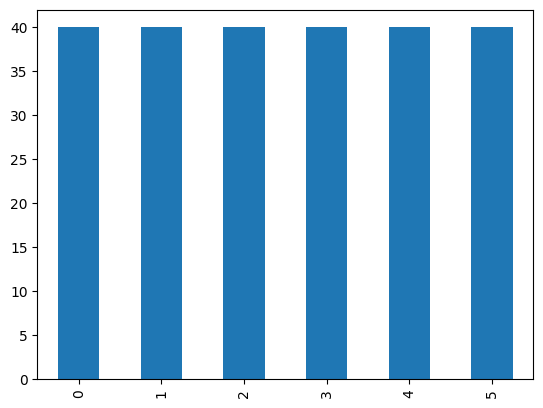

In [7]:
# Visualiza the count of stars for each type of a star
df['Star type'].value_counts().plot(kind = 'bar')
plt.show()

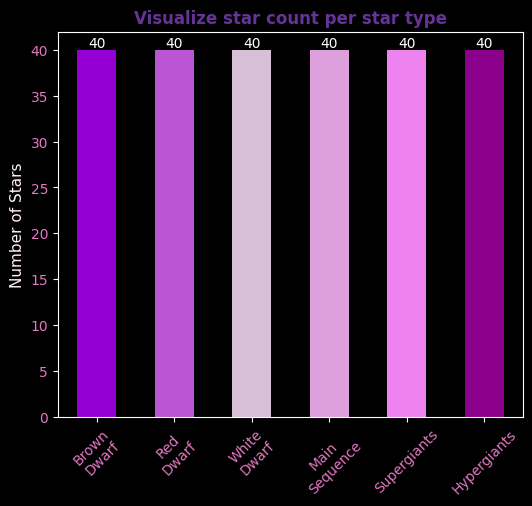

In [17]:
# Customising the plot
plt.figure(figsize = (6, 5))
plt.style.use('dark_background')
ax = df['Star type'].value_counts().plot(kind = 'bar', color = ['darkviolet',
                                                                'mediumorchid',
                                                                'thistle',
                                                                'plum',
                                                                'violet',
                                                                'darkmagenta'])
ax.bar_label(ax.containers[0], color = 'white')
plt.title('Visualize star count per star type', color = 'rebeccapurple', weight = 'bold')
plt.yticks(color = 'tab:pink')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5],
           labels = ['Brown\nDwarf',
                     'Red\nDwarf',
                     'White\nDwarf',
                     'Main\nSequence',
                     'Supergiants',
                     'Hypergiants'],
           rotation = 45,
           color = 'tab:pink')
plt.ylabel('Number of Stars', color = 'lavenderblush', fontsize = 11)
plt.savefig(base_dir + 'barplot_star_count_per_type.png')
plt.show()

### Creating visuals using Matplotlib and *Seaborn*

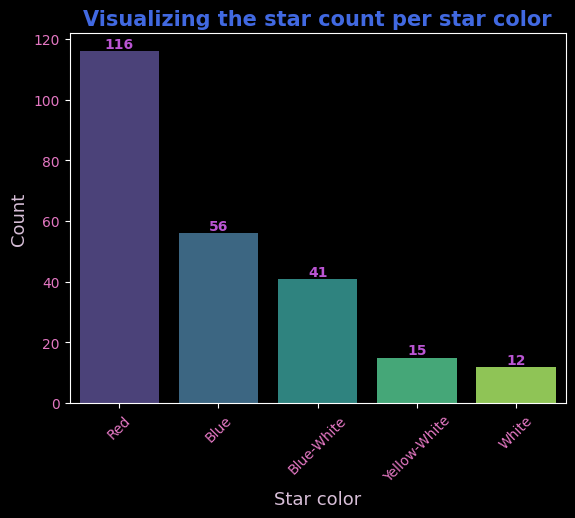

In [18]:
# Visualising the Star color data using seaborn
ax = sns.barplot(x = df['Star color'].value_counts().index,
                 y = df['Star color'].value_counts(),
                 hue=df['Star color'].value_counts().index,
                 palette = 'viridis',)
for container in ax.containers:
    ax.bar_label(container, color='mediumorchid', weight='bold', fontsize=10)

plt.xticks(rotation = 45, color = 'tab:pink')
plt.yticks(color = 'tab:pink')
plt.xlabel('Star color', color = 'thistle', fontsize = 13)
plt.ylabel('Count', color = 'thistle', fontsize = 13)
plt.title('Visualizing the star count per star color',
          color = 'royalblue',
          fontsize = 15,
          weight = 'bold')

plt.savefig(base_dir + 'barplot_star_count_per_color.png')
plt.show()

### Creating a Boxplot

In [10]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


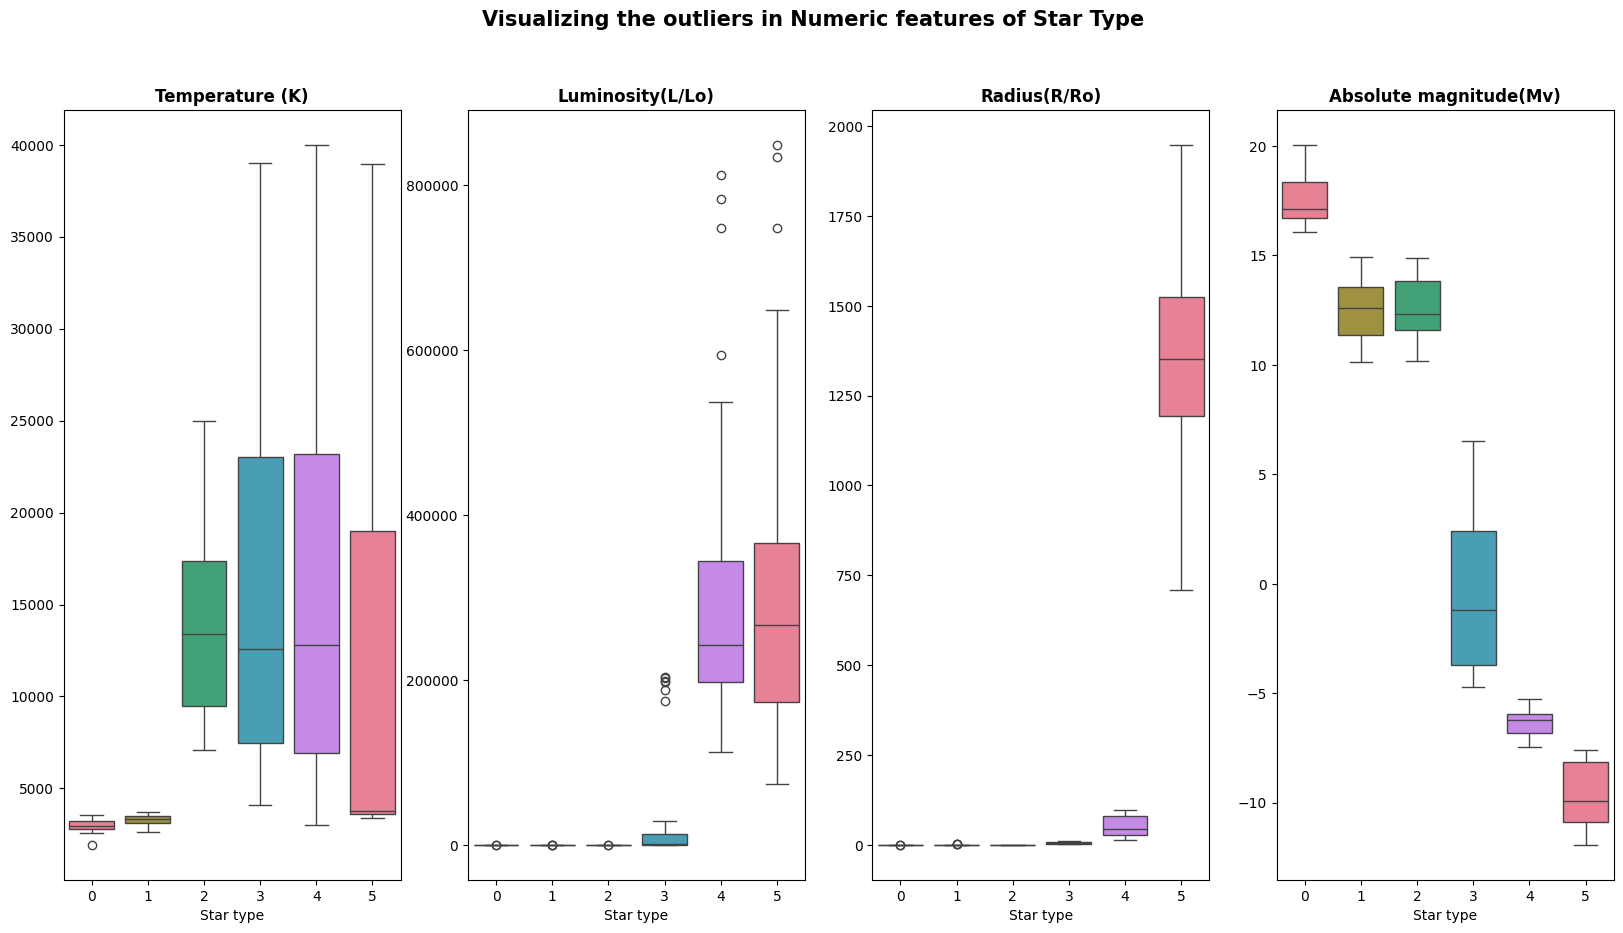

In [20]:
plt.figure(figsize = (20, 10))
plt.style.use('default')
plt.suptitle('Visualizing the outliers in Numeric features of Star Type',
             color = 'black',
             weight = 'bold',
             fontsize = 15)

colors = ['blue', 'green', 'orange', 'purple']

for i in range(4):
  plt.subplot(1, 4, i+1)
  sns.boxplot(x = df['Star type'],
              y = df.iloc[:, i],
              hue=df['Star type'],
              palette='husl')
  plt.ylabel('')
  plt.title(df.columns[i],
            weight = 'bold')
  plt.legend().set_visible(False)
plt.savefig(base_dir + 'star_type_boxplot.png')
plt.show()

**0** → Brown Dwarf      
**1** → Red Dwarf       
**2** → White Dwarf       
**3** → Main Sequence      
**4** → Supergiants      
**5** → Hypergiants

### Creating a Line Chart

In [12]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [13]:
def line_subplot(df, colors, i):
  plt.subplot(4, 1, i+1)
  plt.plot(df.iloc[:, i], color = colors[i])
  plt.style.use('default')
  plt.title(df.columns[i], color = 'red')

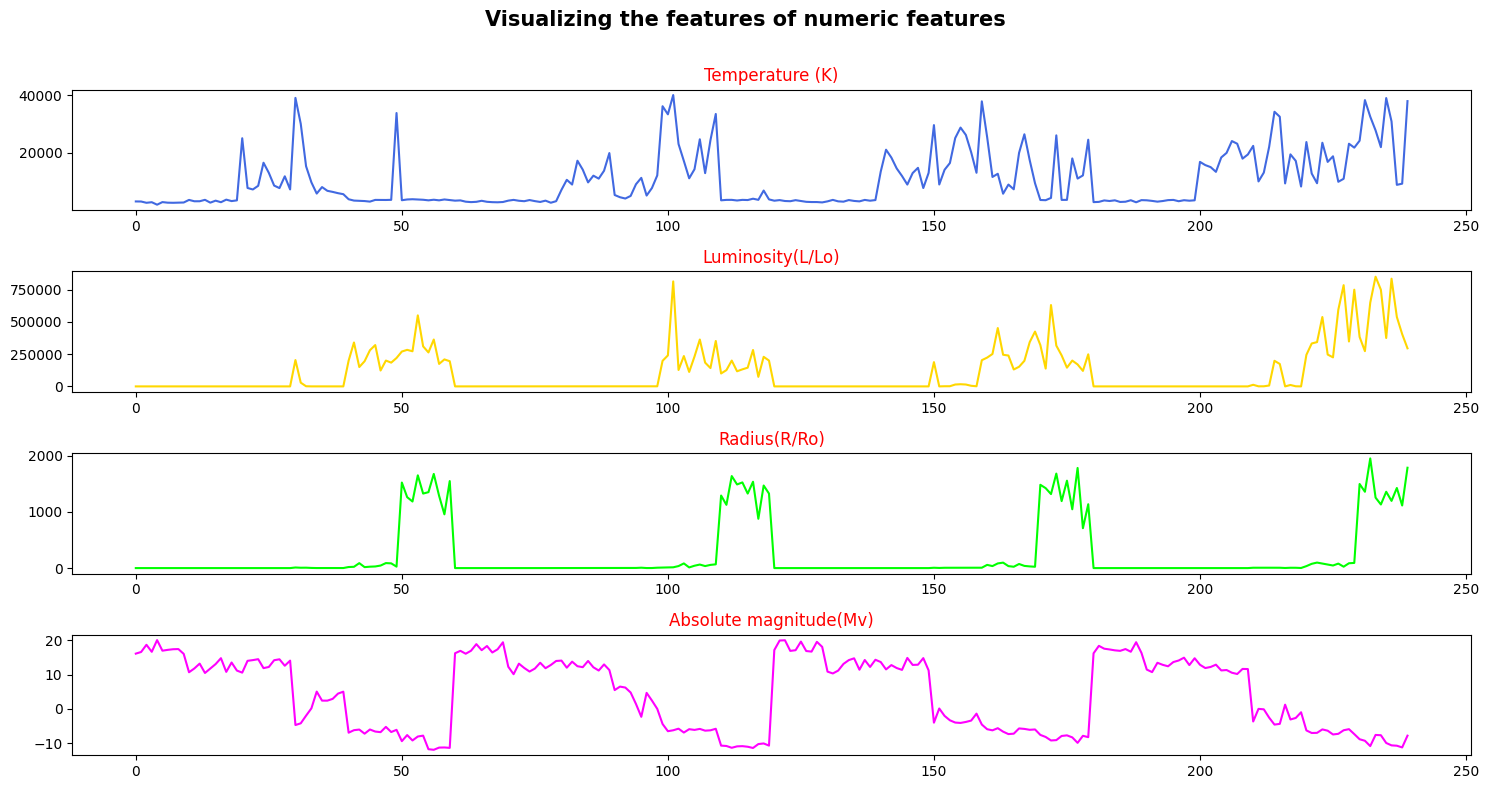

In [14]:
# Line plots shows how the values are distributed for each of the numeric features
colors = ['royalblue', 'gold', 'lime', 'magenta']
plt.figure(figsize = (15, 8))
plt.suptitle('Visualizing the features of numeric features\n',
             color = 'black',
             fontsize = 15,
             weight = 'bold')

for i in range(4):
  line_subplot(df, colors, i)

plt.tight_layout()
plt.savefig(base_dir + 'line_subplot.png')
plt.show()

### Creating a Pair Plot

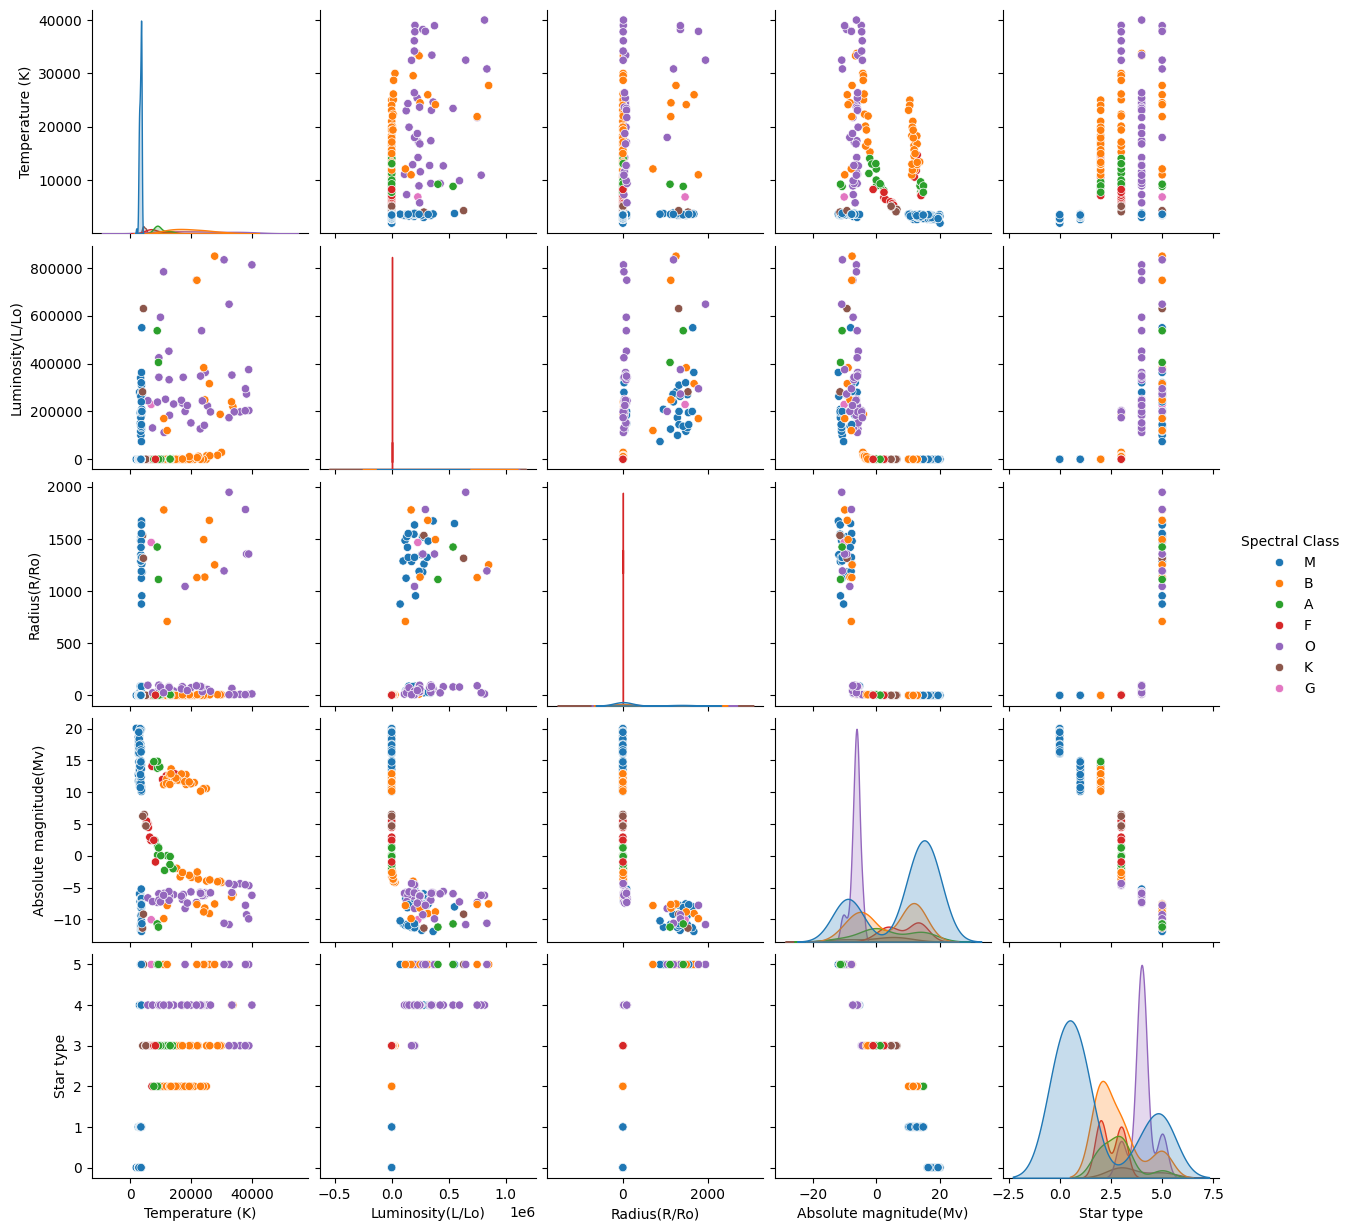

In [15]:
sns.pairplot(df, hue = 'Spectral Class')
plt.savefig(base_dir + 'pairplot.png')
plt.show()

### Creating a scatter plot of HR Diagram

In [39]:
temperature = df['Temperature (K)'].values
abs_mag = df['Absolute magnitude(Mv)'].values
star_type = df['Star type'].values

star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': "."},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': "."},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': "."},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': "o"},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': "o"},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': "o"}
}


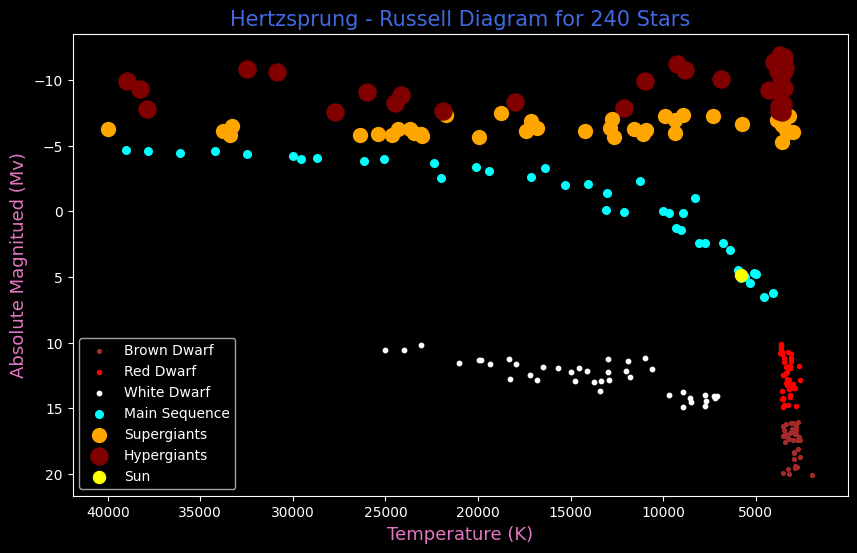

In [50]:
axes = []
labels = set()

plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

for i in range(len(star_type)):
  properties = star_types[star_type[i]]

  if properties['label'] not in labels:
    ax = plt.scatter(temperature[i], abs_mag[i],
                    s = properties['size'],
                    c = properties['color'],
                    marker = properties['marker'],
                    label = properties['label'])
    axes.append(ax)
    labels.add(properties['label'])
  else:
    plt.scatter(temperature[i], abs_mag[i],
                  s = properties['size'],
                  c = properties['color'],
                  marker = properties['marker'],
                  label = properties['label'])

# Adding the Sun data
ax_sun = plt.scatter(5778,
                     4.83,
                     s = 75,
                     c = 'yellow',
                     marker = 'o',
                     label = 'Sun')
axes.append(ax_sun)
labels.add("Sun")

plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars",
          fontsize = 15,
          color = 'royalblue')

plt.ylabel("Absolute Magnitued (Mv)",
           fontsize = 13,
           color = 'tab:pink')
plt.xlabel("Temperature (K)",
           fontsize = 13,
           color = 'tab:pink')

plt.legend(handles = axes)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.savefig(base_dir + 'hr_diagram.png')
plt.show()

### Extracting the output folder...

In [52]:
from google.colab import files
!zip -r /content/star_plots.zip /content/star_plots
files.download('/content/star_plots.zip')

  adding: content/star_plots/ (stored 0%)
  adding: content/star_plots/pairplot.png (deflated 3%)
  adding: content/star_plots/barplot_star_count_per_color.png (deflated 10%)
  adding: content/star_plots/line_subplot.png (deflated 5%)
  adding: content/star_plots/star_type_boxplot.png (deflated 23%)
  adding: content/star_plots/barplot_star_count_per_type.png (deflated 10%)
  adding: content/star_plots/hr_diagram.png (deflated 6%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>